<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/SkLearn_Bagging_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootstrap Aggregating (Bagging) and Boosting to Reduce Variance and Bias in Decision Tree Analysis

> Semant Jain, PhD 
> semant@gmail.com

### Background
As individual machine learning algorithms such as decision trees can lead to overfitting, averaging all the constituent models has been observed to reduce bias and variance. This improves stability and accuracy. 

Bootstrap aggregating (Bagging) is a machine learning algorithm used for classification and regression. As an ensemble training model, Bagging promotes variance by training each model by using a randomly drawn subset of the training set. Here averaging all the constituent models reduces variance and overfitting which can improve stability and accuracy.  In the ensemble, each model votes with equal weight. For instance, very high classification accuracy can be achieved by the random forest algorithm by using bagging to combine random decision trees. While bagging has been usually applied to decision tree methods, it can be used with any other type of classification or regression method.

Boosting, one of the averaging methods in Machine Learning, reduces bias and may also reduce variance. Here, each consituent model is built sequentially. While each constituent may be individually weak, by giving different weights to the constituent models, the combined estimator has reduced bias. By favoring instances misclassifed by previous classifiers, AdaBoost acts as an adaptive algorithm. Thus, the latter models focus on harder to classify instances. While AdaBoost is sensitive to noisy data and outliers, it is less susceptible to overfitting leading to a strong final classifier. Thus, AdaBoost with Decision Trees is often referred to as the best out of the box classifier. 


### Summary
To compare the improvement offered by bagging, a public dataset - Mnist - was analyzed by a decision tree, 5 decision trees, 10 decision trees, and a bagging classifier with 20 estimators. While the decision tree was able to achieve 100% training accuracy, its testing accuracy was merely 84% which indicated overfitting. As the number of decision trees in the ensemble increased, so, did the testing accuracy (89.3% with a random forest with 5 decisions trees, 92.9% with 10 decision trees, and 93.6% with a 20 decision tree classifier).

Similary, to demonstrate Boosting, another simple dataset - Wine - was analyzed by a decision, 5 estimators and 10 estimators with AdaBoost. While the decision tree achieved 100% training accuracy, its testing accuracy was 86.7%. Using the AdaBoost, the testing accuracy increased to 88.9% 
0.8667 0.8889 0.8889

### Contents
+ Setting up
+ Models
+ Visualization


### Libraries
+ Numpy
+ Matplotlib
+ Pandas
+ Sklearn

# 1. Setting up

### Imporing libraries

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.datasets import load_wine

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 2. Bagging

### Importing data

In [0]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


### Decision Tree

In [0]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt1 = dt.score(x_test, y_test)
dt2 = dt.score(x_train, y_train)

print(round(dt1, 4), round(dt2, 4))

0.8222 1.0


### Bagging: Random Forest with 5 Decision Trees

In [0]:
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(x_train, y_train)

rf1 = rf.score(x_test, y_test)
rf2 = rf.score(x_train, y_train)

print(round(rf1, 4), round(rf2, 4))

0.8978 0.9911


### Bagging: Random Forest with 10 Decision Trees

In [0]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(x_train, y_train)

rf3 = rf.score(x_test, y_test)
rf4 = rf.score(x_train, y_train)

print(round(rf3, 4), round(rf4, 4))

0.9333 0.9993


### Bagging: Other classifers

In [0]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, n_estimators = 20, max_features = 1.0) 
bg.fit(x_train, y_train)

bg1 = bg.score(x_test, y_test)
bg2 = bg.score(x_train, y_train)

print(round(bg1, 4), round(bg2, 4))

0.9156 0.9955


# 3. Boosting

### Importing data

In [0]:
dat = load_wine()
dat.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(dat.data, dat.target)

print(x_train.shape, y_train.shape)
print(x_test.shape , y_test.shape)

(133, 13) (133,)
(45, 13) (45,)


### Decision Tree

In [0]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

dt3 = round(dt.score(x_train, y_train), 4)
dt4 = round(dt.score(x_test, y_test), 4)

print(round(dt1, 4), round(dt2, 4))

0.8222 1.0


### Boosting: 5 estimators

In [0]:
ab = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 5, learning_rate = 1)
ab.fit(x_train, y_train)

ab1 = round(ab.score(x_train, y_train), 4)
ab2 = round(ab.score(x_test, y_test), 4)

### Boosting: 10 estimators

In [0]:
ab = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, learning_rate = 1)
ab.fit(x_train, y_train)

ab3 = round(ab.score(x_train, y_train), 4)
ab4 = round(ab.score(x_test, y_test), 4)

# 4. Visualization

In [0]:
### Bagging

In [0]:
# initialise data of lists. 
data = {'Training Accuracy':[dt2, rf2, rf4, bg2], 'Testing Accuracy':[dt1, rf1, rf3, bg1]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Decision Tree', 'Random Forest: 5', 'Random Forest: 10', 'DT Classifier: 20']) 
  
# print the data 
df

,Training Accuracy,Testing Accuracy
Decision Tree,1.000000,0.822222
Random Forest: 5,0.991091,0.897778
Random Forest: 10,0.999258,0.933333
DT Classifier: 20,0.995546,0.915556


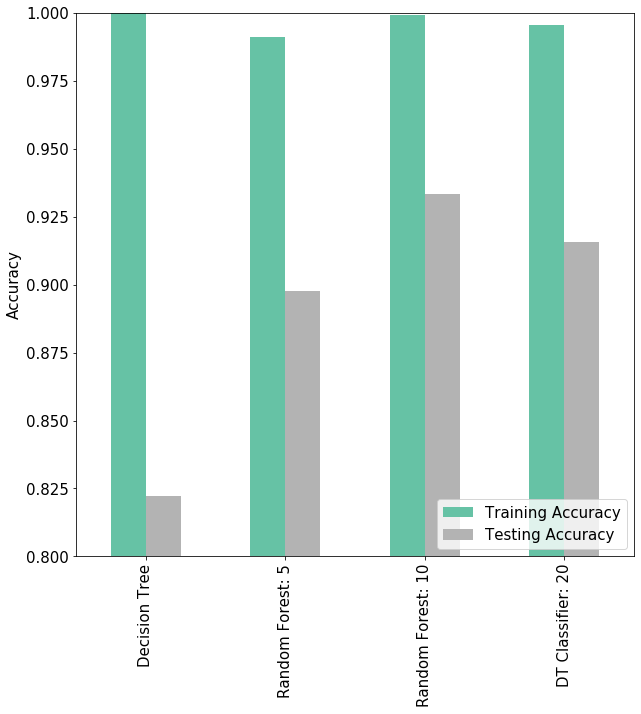

In [0]:
# Plot
df.plot(figsize=(10,10), kind = "bar", legend = True, colormap = 'Set2')
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend(fontsize = 15, loc='lower right')

plt.savefig("CE_ML_Project_16_02_Bagging_Results.jpeg")
plt.show()

### Boosting

In [0]:
# initialise data of lists. 
data = {'Training Accuracy':[dt3, ab1, ab3], 'Testing Accuracy':[dt4, ab2, ab4]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Decision Tree', 'AdaBoost (5)', 'AdaBoost (10)']) 
  
# print the data 
df 

,Training Accuracy,Testing Accuracy
Decision Tree,1.0,0.8667
AdaBoost (5),1.0,0.8889
AdaBoost (10),1.0,0.8889


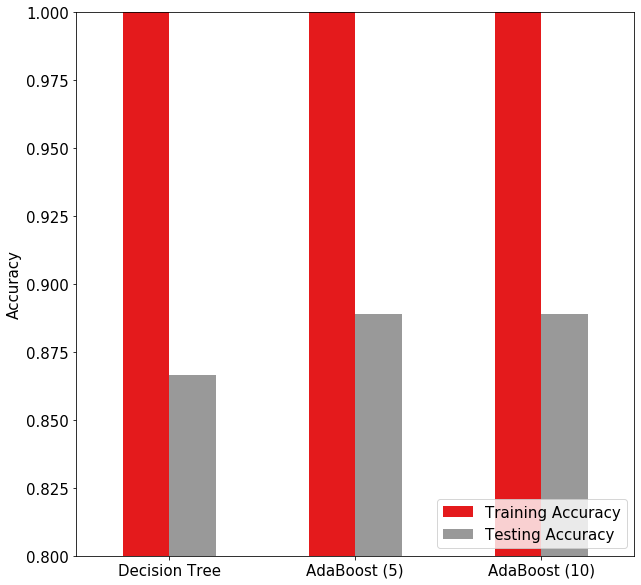

In [0]:
# Plot
df.plot(figsize=(10,10), kind = "bar", legend = True, colormap = 'Set1')
plt.xticks(fontsize = 15, rotation = 0)
plt.yticks(fontsize = 15)
plt.ylim(0.8, 1.0)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend(fontsize = 15, loc='lower right')

plt.savefig("CE_ML_Project_16_04_Boosting_Results.jpeg")
plt.show()